<h1><b> Big Data Analysis project: Red-Wine Quality</b> </h1>

### Topic: Predicting a good Wine Quality depend on physiochemical propeperties.

*Author: VIBOLROTTANA SENG* <br>
*Updated: Wed, 13 October 2021*

## Introduction

The ideas of the topic pop up in my head when i was going to a groceries store. I was walking pass by the beverages section and there so many kinds of red wine with different prices.I got a question to ask myself What really is a good wine? Therefore, I decided to apply some machine learning models to figure out what makes a good quality wine.

In this project i am going to use Kaggle’s Red Wine Quality dataset. By classifying wine as good or bad, for a wine company, one can predict which physiochemical properties of wine makes it "good"!

There are 11 input variables in this project:<br>
<br>
    1.Fixed acidity <br>
    2.Volatile acidity <br>
    3.Citric acid <br>
    4.Residual sugar <br>
    5.Chlorides <br>
    6.Free sulfur dioxide <br>
    7.Total sulfur dioxide <br>
    8.Density <br>
    9.pH <br>
    10.Sulfates <br>
    11.Alcohol <br>


## Steps
    1.Importing Packages
    2.Loading Datasets
    3.Plotting Graphs
    4.Pre-processing dataset
    5.Creating ML models
    5.Tuning

## IMPORTING REQUIRES PACKAGES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## LOADING DATASET

In [2]:
wine_df = pd.read_csv("/Users/Rattana/winequality-red.csv")
print('Dataset Shape: ',wine_df.shape)

#Check Data Destribution
wine_df.head()

Dataset Shape:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Information about datset columns
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## PLOTING GRAPHS FOR BETTER INSIGT TO DATA DESTRIBUTIONS

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

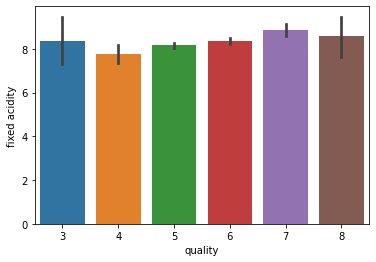

In [4]:
# fixed acidity Vs. quality
sns.barplot(x='quality',y='fixed acidity', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

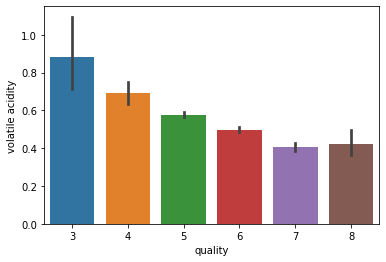

In [5]:
#Volatile acid Vs. quality
sns.barplot(x='quality',y='volatile acidity', data=wine_df)

#### There is DOWNING TREND in the above plot.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

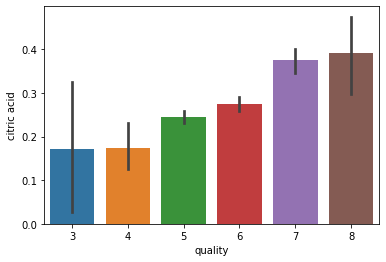

In [6]:
#citric acid Vs. quality
sns.barplot(x='quality',y='citric acid', data=wine_df)

#### There is a INCREASING TREND in the above plot. 

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

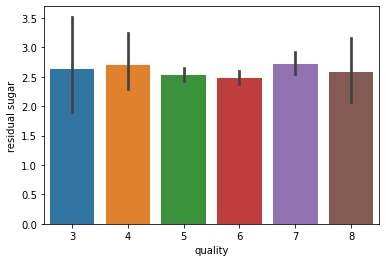

In [7]:
#residual sugar Vs. quality
sns.barplot(x='quality',y='residual sugar', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

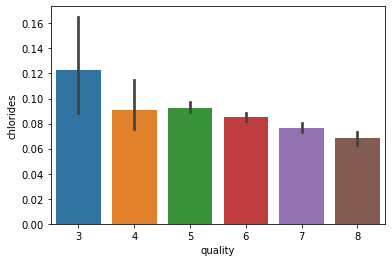

In [8]:
#total chloride Vs. quality
sns.barplot(x='quality',y='chlorides', data=wine_df)

#### There is a DOWNING TREND on the above graph

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

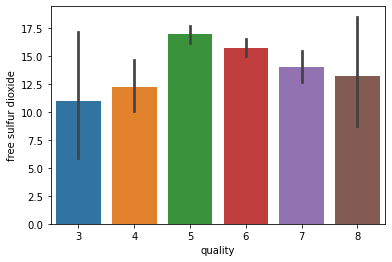

In [9]:
#free sulfur dioxide Vs. quality
sns.barplot(x='quality',y='free sulfur dioxide', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

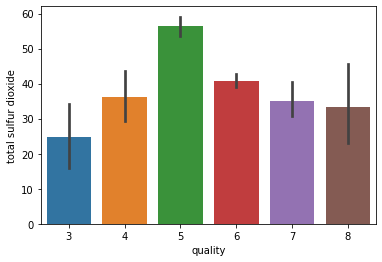

In [10]:
#total sulfur dioxide Vs. quality
sns.barplot(x='quality',y='total sulfur dioxide', data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

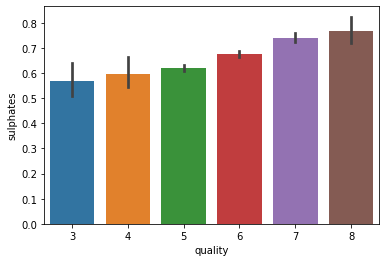

In [11]:
#sulphates Vs. quality
sns.barplot(x='quality',y='sulphates', data=wine_df)

#### There is a INCREASING TREND in the above 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

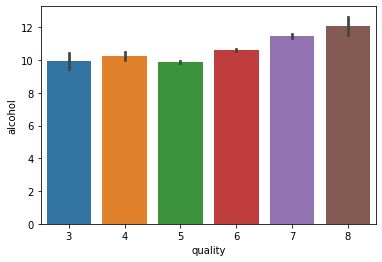

In [12]:
#alcolhol Vs. quality
sns.barplot(x='quality',y='alcohol', data=wine_df)

#### There is a INCREASING TREND in the above graph.

<AxesSubplot:xlabel='quality', ylabel='pH'>

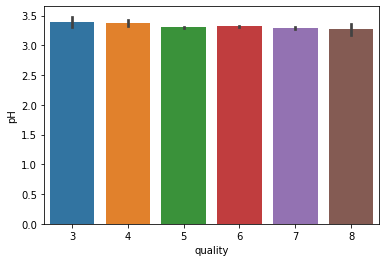

In [13]:
sns.barplot(x='quality',y='pH', data=wine_df)

#### There is a DOWNWARD TREND in the graph above.

## PRE-PROCESSING DATA FOR ML ALGORITHM

*Use only dependent variable 'quality'*

In [14]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

*Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project, I converted the output to a binary output where each wine is either “good quality” (a score of 7 or higher) or not (a score below 7)*

In [15]:
wine_df['quality'] = wine_df['quality'].apply(lambda x: 1 if x> 6.5 else 0)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


0    1382
1     217
Name: quality, dtype: int64


/Users/Rattana/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

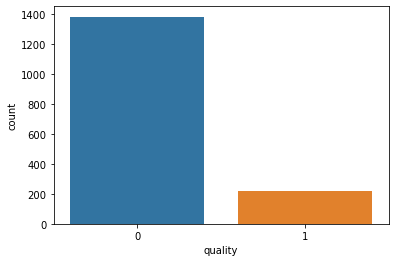

In [16]:
print(wine_df['quality'].value_counts())

sns.countplot(wine_df['quality'])

The graphs shows that the majority of the dataset shows that the wine is bad which means that it majority of wine quality in the dataset is below 7.

In [17]:
#Seperating to Dependent and Independent variables 

x = wine_df.iloc[:, :-1].values
y = wine_df.iloc[:, -1].values

In [18]:
x

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [19]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
#Splitting into train and test datasets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

print('X-train shape: ',x_train.shape)
print('x-test shape: ',x_test.shape)
print('y-test shape: ',y_train.shape)
print('y-train shape: ',y_test.shape)

X-train shape:  (1279, 11)
x-test shape:  (320, 11)
y-test shape:  (1279,)
y-train shape:  (320,)


In [21]:
#applying standard scaling to the dataset to scale all the field values to same scale approximately.

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## CREATING ML ALGORITHMS
    1.Random Forest Classifier

In [22]:
#Creating Random Forest Classifier Instance

rf_regressor = RandomForestClassifier(n_estimators = 100)

# Fitting the classifier with training data
rf_regressor.fit(x_train,y_train)

#Predicting using classifier
y_pred =  rf_regressor.predict(x_test)

[[263  10]
 [ 29  18]]


<Figure size 720x432 with 0 Axes>

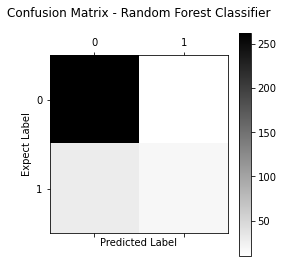

In [23]:
#confusion matrix using the Random Forest Classifier
fig =  plt.figure(figsize = (10,6))
cm = confusion_matrix(y_test,y_pred)
print(cm)

#matplot for confusion matrix of random forest classifier
plt.matshow(cm, cmap=plt.cm.binary, interpolation = 'nearest')
plt.title('Confusion Matrix - Random Forest Classifier\n')
plt.colorbar()
plt.ylabel('Expect Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
print('Total Prediction: ',len(y_pred))
print('Correct Prediction: ',sum(y_pred == y_test))
print('Incorredt Prediction: ',sum(y_pred != y_test))
print('Accuracy:', sum(y_pred == y_test)*100 / len(y_pred),'%')

Total Prediction:  320
Correct Prediction:  281
Incorredt Prediction:  39
Accuracy: 87.8125 %


## Tuning ML
    1.Random Forest Classifier

In [25]:
estimator = rf_regressor
x = x_train
y = y_train
rf_eval = cross_val_score(estimator, x ,  y , cv = 10)
rf_eval.mean()

0.9124569389763779

In [26]:
# Filtering df for only good quality
df_temp = wine_df[wine_df['quality']==1]
df_temp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [27]:
# Filtering df for only bad quality
df_temp2 = wine_df[wine_df['quality']==0]
df_temp2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0


## RESULT

    1. We Created ML Classifier for classifying wine as GOOD or BAD
    2. The dataset contained 1599 and 12 fields.
    3. Random Forest Classifier classified with an accuracy of 87.18% and 90% after tuning.

## Conclusion

#### To conclude, we can see that good quality wines have higher levels of alcohol on average, have a lower volatile acidity on average, higher levels of sulphates on average, and higher levels of residual sugar on average.